In [32]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio

In [33]:
DATA_FRAMES = True
fem_path = 'data/Female_features.csv'
mal_path = 'data/Male_features.csv'

In [34]:
Females_Features = pd.read_csv(fem_path)
Males_Features = pd.read_csv(mal_path)

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [36]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [37]:
male_Y.shape

(4710,)

In [38]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

In [39]:
male_Y.shape

(4710, 2)

In [40]:
type(male_Y)

numpy.ndarray

In [41]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8618, 20), (8618, 2), (2155, 20), (2155, 2))

In [42]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((8618, 20, 1), (8618, 2), (2155, 20, 1), (2155, 2))

In [43]:
type(x_train),type(y_train),type(x_test),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [44]:
import tensorflow
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [45]:
# # Partition into train and test
# X_train, X_test, Y_train, Y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
# # # Partition into train and validation
# # X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [46]:
# X_train_cnn = np.expand_dims(X_train, axis=2)
# X_eval_cnn = np.expand_dims(X_eval, axis=2)
# X_test_cnn = np.expand_dims(X_test, axis=2)
# X_train_cnn.shape, X_eval_cnn.shape, X_test_cnn.shape

In [49]:
def train_model(X_train,X_eval, y_train, y_eval,batch_size,initializer,lr = 1e-3,epochs=10):
    model = Sequential()
    model.add(Conv1D(128, 5,padding='same',
                  input_shape=(20,1),kernel_initializer=intializer))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
    model.add(Flatten())
    model.add(Dense(2,kernel_initializer=intializer))
    model.add(Activation('softmax'))
    print("------------------MODEL SUMMARY------------------")
    model.summary()
    print("------------------MODEL TRAINING------------------")
    opt = keras.optimizers.RMSprop(learning_rate=lr,rho=0.9, epsilon=None)
    model.compile(loss='categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
    model_history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_eval,y_eval),verbose=True)

    return model,model_history

In [50]:
intializer = keras.initializers.glorot_normal(seed=None)
model, model_history = train_model(x_train, x_test,y_train,y_test,32,intializer,lr = 0.00005,epochs=50)

------------------MODEL SUMMARY------------------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 20, 128)           768       
                                                                 
 activation_30 (Activation)  (None, 20, 128)           0         
                                                                 
 conv1d_31 (Conv1D)          (None, 20, 128)           82048     
                                                                 
 activation_31 (Activation)  (None, 20, 128)           0         
                                                                 
 dropout_10 (Dropout)        (None, 20, 128)           0         
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 2, 128)            0         
 g1D)                                                            
    

Epoch 35/50
270/270 [==============================] - 2s 8ms/step - loss: 0.1295 - accuracy: 0.9524 - val_loss: 0.1600 - val_accuracy: 0.9434
Epoch 36/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1257 - accuracy: 0.9493 - val_loss: 0.1739 - val_accuracy: 0.9341
Epoch 37/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1254 - accuracy: 0.9534 - val_loss: 0.1601 - val_accuracy: 0.9378
Epoch 38/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1214 - accuracy: 0.9506 - val_loss: 0.2162 - val_accuracy: 0.9281
Epoch 39/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1151 - accuracy: 0.9557 - val_loss: 0.1494 - val_accuracy: 0.9471
Epoch 40/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1132 - accuracy: 0.9545 - val_loss: 0.1402 - val_accuracy: 0.9485
Epoch 41/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1102 - accuracy: 0.9574 - val_loss: 0.1556 - val_accuracy: 0.9448

In [54]:
def show_graphs(history):
    epochs = [i for i in range(50)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

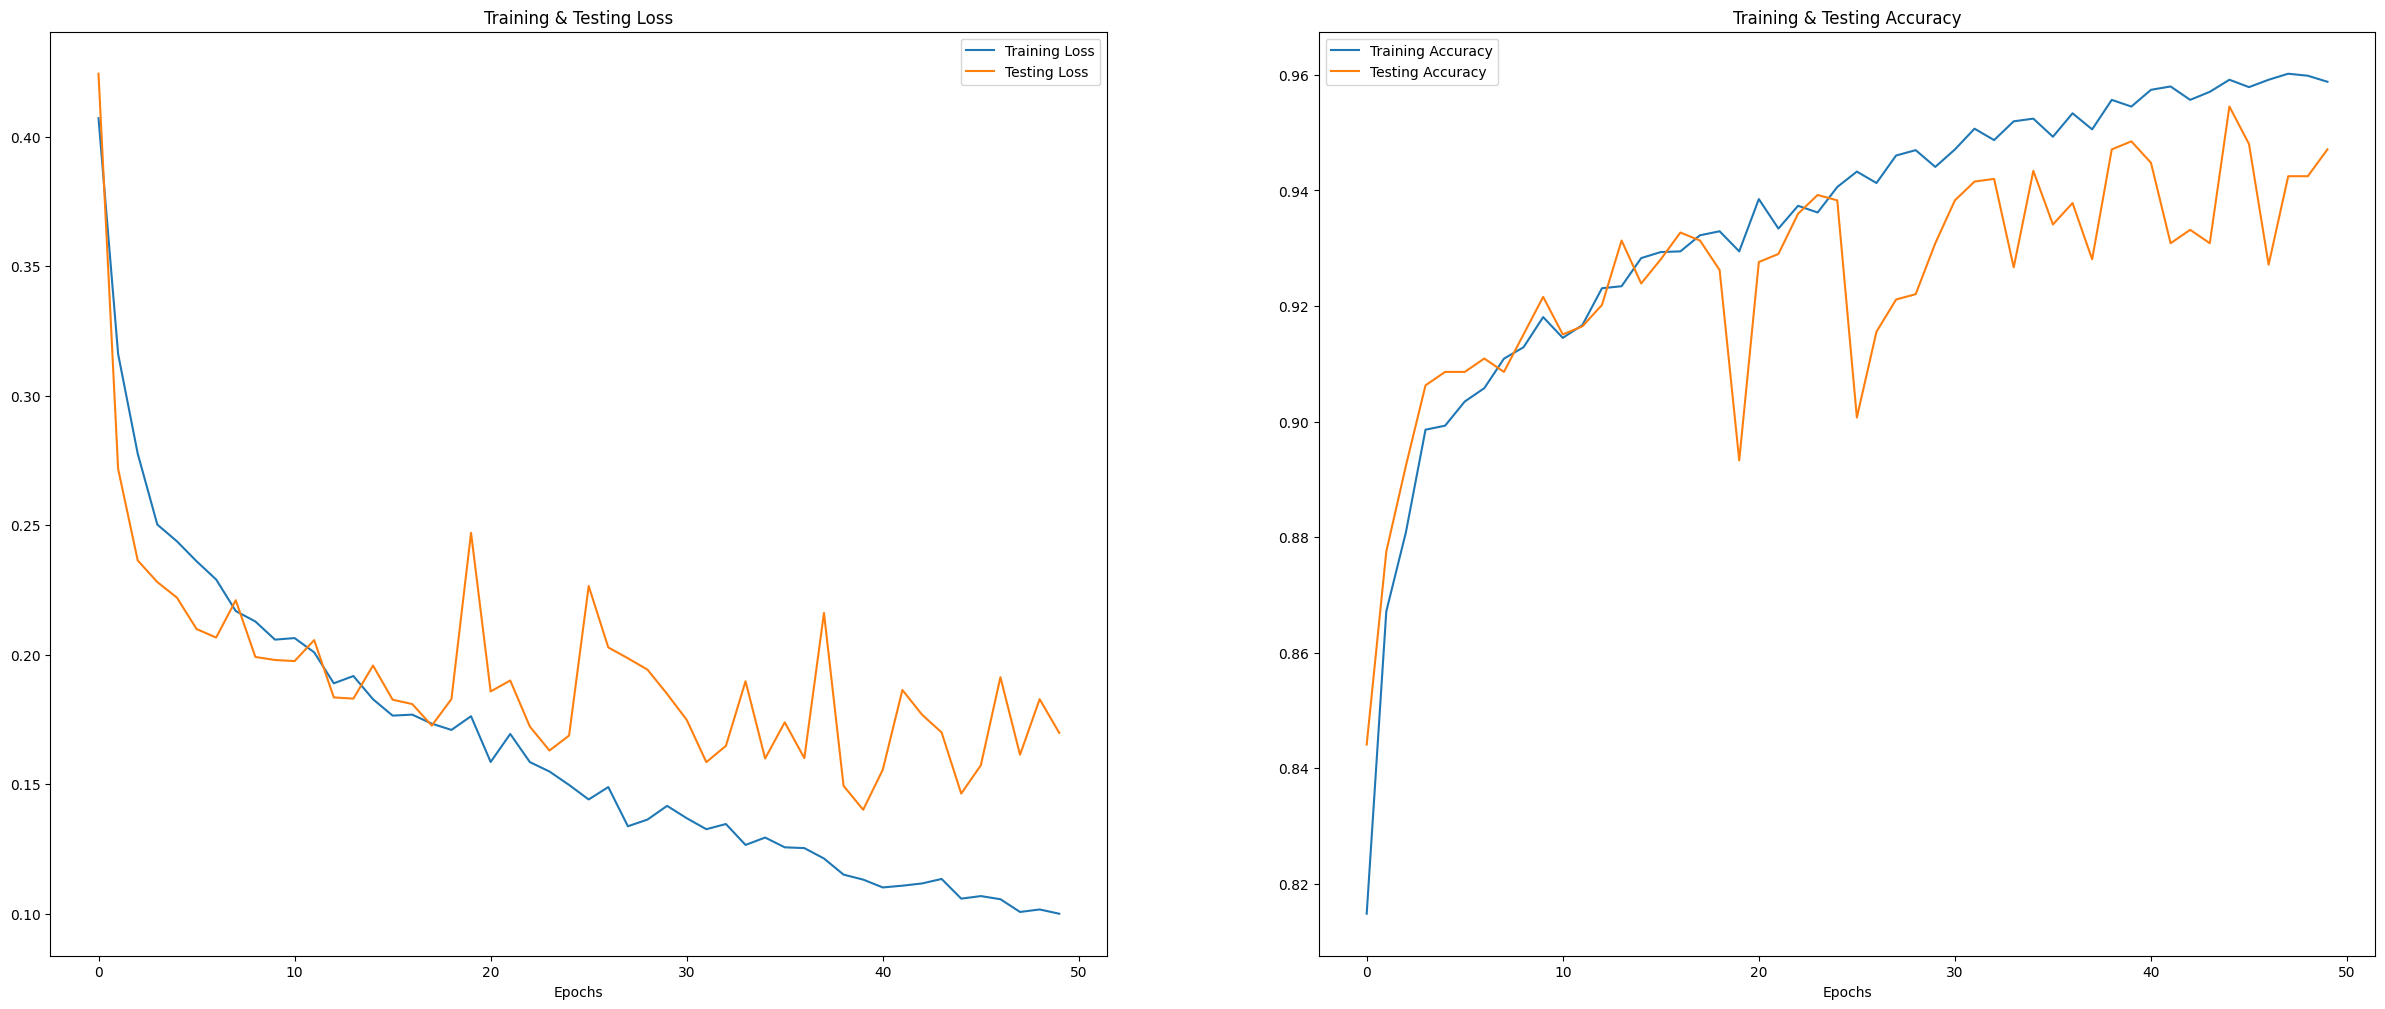

In [55]:
show_graphs(model_history)

In [57]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

68/68 [==============================] - 0s 2ms/step


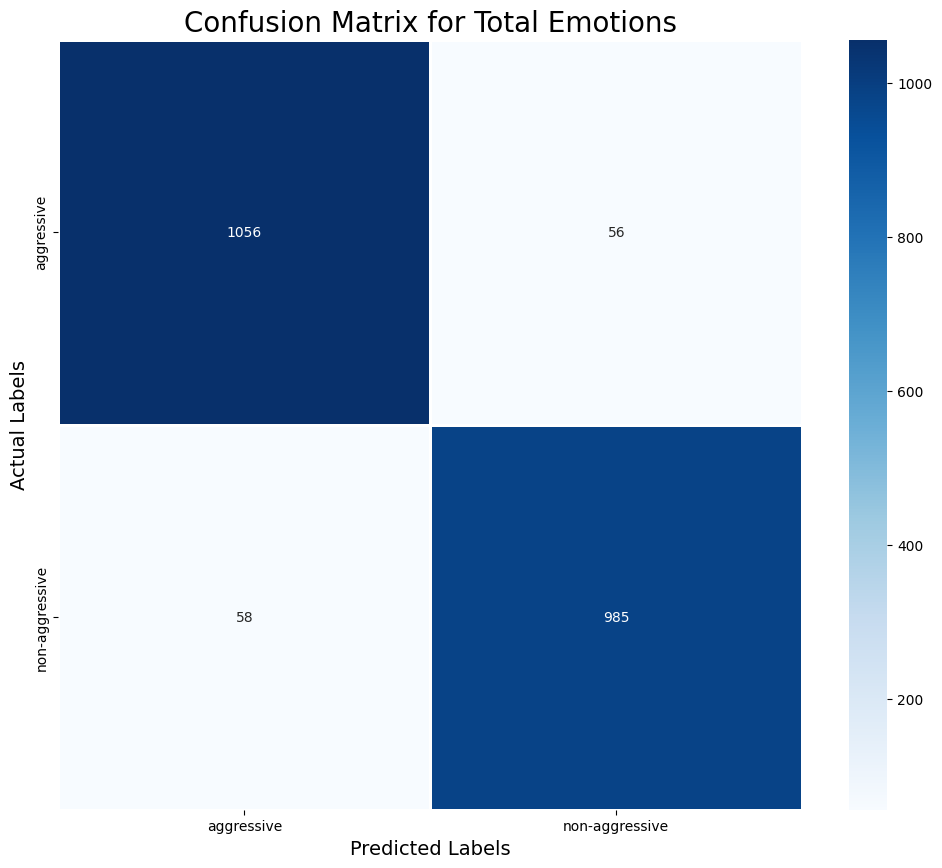

In [58]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()